# Lesson 22: Introduction to Matplotlib

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l22_intro_to_matplotlib.ipynb).*

In [2]:
# NumPy, of course
import numpy as np

# We'll use the scipy.stats module
import scipy.stats

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Seaborn makes plots pretty!  Hold off on import till later to demonstrate.
# import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline
%config InlineBackend.figure_format = 'svg'

We had a nice data set in the last tutorial, the cross-sectional areas of eggs from different mothers with different feeding conditions.  While it is instructive to look at values, such as medians, etc., computed from NumPy arrays with the data, we would of course like to plot the results.  The [Matplotlib package](http://matplotlib.org) is the central plotting software in the SciPy stack.  In this lesson, we will explore its capabilities and API.  [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) is another great package that allows for nice formatting of Matplotlib plots, that you should have installed in [Lesson 0](l00_configuring_your_computer.html).

A couple comments:

1. Matplotlib will soon have its 2.0 release. This will feature many improvements, and default graphs will look much nicer.  It will also have many of the stylings of Seaborn available.
2. There are many other great plotting tools.  In particular, [Plotly](https://plot.ly) and [Bokeh](http://bokeh.pydata.org/) make beautiful, interactive, browser-based plots.  The former is available via `conda`, and it my preferred choice.

Ok, let's start using Matplotlib!

## Importing Matplotlib
Most of the plotting you will do, and all of the plotting we do in bootcamp, will use Matplotlib's `pyplot` module.  Like NumPy, this module is pervasive, and the custom is to import it like this:

    import matplotlib.pyplot as plt
    
This is what we did at the beginning of this lesson.  For some special types of plotting, you will need to import other Matplotlib modules, but we will not do that in the bootcamp.

## First example: making a histogram
Let's load in our egg cross-sectional area data again.

In [3]:
# Load in data
xa_high = np.loadtxt('../data/xa_high_food.csv', comments='#')
xa_low = np.loadtxt('../data/xa_low_food.csv', comments='#')

For our first plot, we'll make a histogram using Matplotlib.

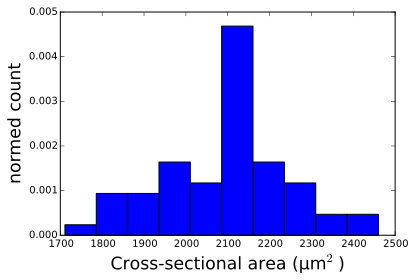

In [4]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

Let's go through this line-by-line.  The first line makes the histogram.

    _ = plt.hist(xa_low, normed=True)
    
We put the "underscore equals" in front of the function call because `plt.hist()` returns a tuple of NumPy arrays containing the bins and counts for the histogram.  Because it is of no use to us, we just assign it the dummy variable `_`.  The first argument is the data set we want to compute and plot a histogram for.  The `normed` kwarg says that we want the normed histogram, i.e., the sum of the areas of all the bars is unity.

In the next line, we label the $x$-axis.

    plt.xlabel('Cross-sectional area (µm$^2$)')
    
The dollar signs around the `^2` tell Matplotlib that we invoke $\LaTeX$ to render the string.  $\LaTeX$ is a type-setting program that is very useful for displaying mathematical equations.

Finally, the last line adds the $y$-axis label.

### Tweaking the defaults
I would argue that the bars should lie at tick marks to make things more clear.  I.e., we should bin the data to be between 1700 and 1750, 1750 and 1800, and so on.  We can specify the bins we want in our call to `plt.hist()`.  The `np.arange()` function helps with this.

In [5]:
# Make bin boundaries
bins = np.arange(1700, 2501, 50)

`np.arange(start, stop, stride)` generates evenly spaced points going from `start` to `stop` (exclusively, just like indexing) with a stride of `stride`.  We can then use these bin boundaries with the `bins` kwarg.  If `stride` is not given, the default is `stride = 1`.  If only one argument is given, `start` is assumed to be zero and `stride` is assumed to be `1`.

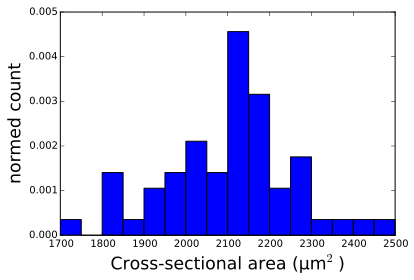

In [6]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

### Using Seaborn to make it look pretty
I would argue that the plot is ugly.  The strong blue color is offensive.  Inward ticks are in general a very bad idea.  (Note, these defaults will be fixed in Matplotlib 2.0, and everything will look nicer.)  Seaborn is a useful package for making plots look pretty (and also for doing some nice statstical plots).  To invoke Seaborn, we need to import it.  We can then set the properties of the plots using `sns.set()`.

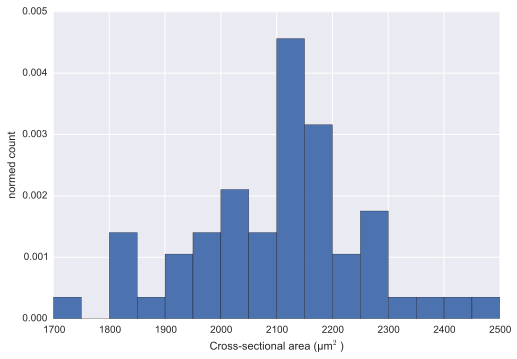

In [7]:
import seaborn as sns
sns.set()

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

Much nicer!  I actually think the axis labels are a big small, especially if they are going to be used in a talk, so I like to set them larger.  We can do this with kwargs in the `plt.xlabel()` call.

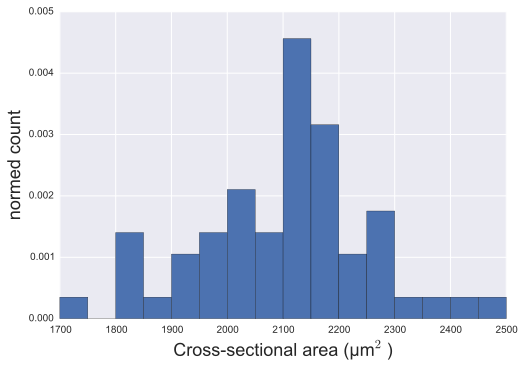

In [8]:
# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)', fontsize=18)
plt.ylabel('normed count', fontsize=18)

That's better!  We can actually avoid retypeing that kwarg every time by setting the Seaborn context.  I have my favorite settings, which we can invoke with the `sns.set_context()` function.

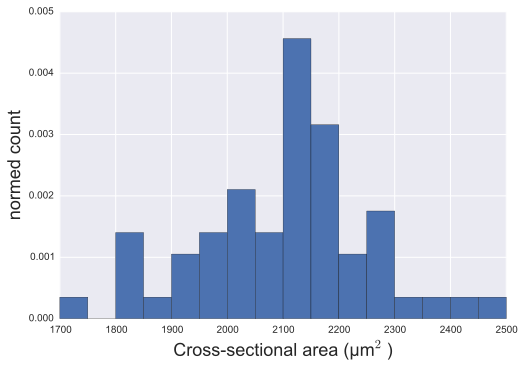

In [9]:
# JB's favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

### Plotting the two histograms together
It would be nice to compare the histograms of the to data sets.  This is done quite intuitively.

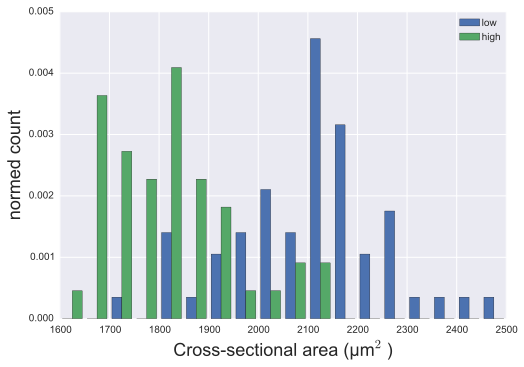

In [10]:
# Reset bins, since xa_llow has smaller values
bins = np.arange(1600, 2501, 50)

# Generate the histogram for the low-density fed mother
_ = plt.hist((xa_low, xa_high), normed=True, bins=bins)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

# Add a legend
plt.legend(('low', 'high'), loc='upper right')

We passed two arrays into `plt.hist` as a tuple, and it automatically made the two histrograms.  Notice that we also added a legend to the upper corner using `plt.legend`.

I actually think this style of displaying a histogram is hideous.  The bins have now become ambiguous.  Here's how I would do it (not really, though, as we'll see).

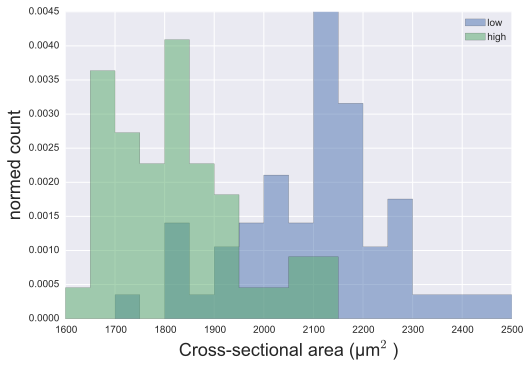

In [11]:
# Reset bins, since xa_llow has smaller values
bins = np.arange(1600, 2501, 50)

# Generate the histogram for the low-density fed mother
_ = plt.hist(xa_low, normed=True, bins=bins, histtype='stepfilled', alpha=0.5)
_ = plt.hist(xa_high, normed=True, bins=bins, histtype='stepfilled', alpha=0.5)

# Add axis labels
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('normed count')

# Add a legend
plt.legend(('low', 'high'), loc='upper right')

The bin boundaries are again clear.  I used the `histtype` kwarg to indicate that I wanted a "step filled" histogram.  I set the kwarg `alpha` to 0.5, which says I want the fill to only 50% opaque to allow visualization of the overlap of the histrograms.

### There are many plotting options!
One of the main aims I had in this example is that there are many many options available for making plots and stylizing them through various functions and kwargs.  The [Matplotlib wesbite](http://matplotlib.org) is chuck full of examples and good documentation.  You should refer to it extensively as you prepare your plots!

## Plotting $x, y$ data
We have seen how to plot histograms, but we so often need to plot $x,y$ data.  This is also easy to do.  As a demonstration, we will plot the cumulative histogram of the egg cross-sectional area data.  In fact, if I am going to plot histograms, especially for data where the number of data points is less than 1000, I prefer to plot the cumulative histogram.  Cumulative histograms have no binning bias, so there is only one way to represent them.

To plot a cumulative histogram, the $x$-values are simply the sorted values of the array.  The values of the $y$ axis are $y_j = j / n$, where $n$ is the number of data points.  This is very easily computed using the `np.sort()` and `np.arange()` functions.

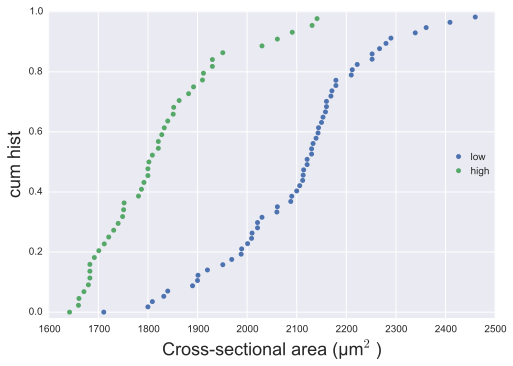

In [12]:
# The x-values are just the sorted array
xa_low_sort = np.sort(xa_low)
xa_high_sort = np.sort(xa_high)

# The y-axis values for the cumulative histogram
y_low = np.arange(len(xa_low)) / len(xa_low)
y_high = np.arange(len(xa_high)) / len(xa_high)

# Plot the result
plt.plot(xa_low_sort, y_low, marker='.', linestyle='', markersize=10)
plt.plot(xa_high_sort, y_high, marker='.', linestyle='', markersize=10)

# Axis lables and legend
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('cum hist')
plt.legend(('low', 'high'), loc='center right')

# Fix the margins
plt.margins(y=0.02)

Let's go through this line-by-line.  We first use the `np.sort()` function to sort our arrays.  Next, we use the `np.arange()` function to get numbers ordered from 1 to $n$, where $n$ is the number of data points.  We divide that range of numbers by $n$ to get the cumulative histogram values.

The function `plt.plot()` is used to plot $x,y$ data.  The first argument is the $x$ values and the second argument is the $y$ values, both as NumPy arrays.  We then use keyword arguments to stylize the plots.  `marker = '.'` says that we want dots.  `linestyle=''` says that we do not want lines.  `markersize = 10` says that we want out dots to be of size 10 pixels.

Next, we make axis labels and create the legend as before.  Finally, the `plt.margins(y=0.02)` function call means that we want a buffer of 2% of the total plot area above and below the data points.  This prevents plotted points from being cut off.

### Plotting a smooth line
To demonstrate how to plot a smooth line, we will overlay a plot of the cumulative distribution function of a Gaussian (a.k.a. normal) distribution with the same mean and standard deviatio as the data.  This might be used as check to see if the data are normally distributed (though there are better graphical ways to do this).  We know the cumulative distribution function for a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$ is

\begin{align}
\mathrm{cdf}(x) = \frac{1}{2}\left(1 + \mathrm{erf}\left(\frac{x - \mu}{\sqrt{2\sigma^2}}\right)\right),
\end{align}

but insteady of coding this up directly, we can use the `scipy.stats` to do it for us!  We just need to supply where we want it evaluated ($x$), and the mean (the location parameter) and standard deviation (the scale parameter).

`plt.plot()` will draw lines between points.  To make a smooth curve, then, we need several points.  To give the $x$ values to make a smooth curve, a good rule of thumb is to use 200 points, though you may need more if the curve varies strongly.

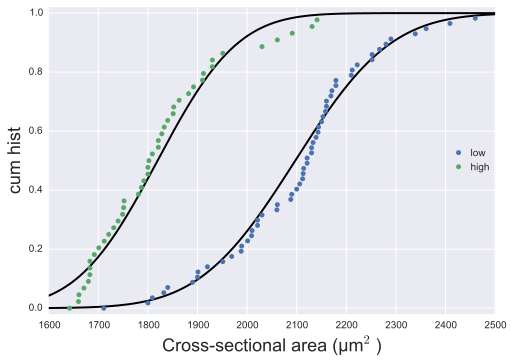

In [13]:
# Make 200 evenly spaced points between 1600 and 2500
xa_smooth = np.linspace(1600, 2500, 200)

# Generated the y-values for the smooth plots
y_low_smooth = scipy.stats.norm.cdf(xa_smooth, loc=xa_low.mean(), 
                                     scale=xa_low.std())
y_high_smooth = scipy.stats.norm.cdf(xa_smooth, loc=xa_high.mean(), 
                                     scale=xa_high.std())

# Plot all of the curves
plt.plot(xa_smooth, y_low_smooth, marker='None', linestyle='-', color='black')
p1, = plt.plot(xa_low_sort, y_low, marker='.', linestyle='', markersize=10)
plt.plot(xa_smooth, y_high_smooth, marker='None', linestyle='-', color='black')
p2, = plt.plot(xa_high_sort, y_high, marker='.', linestyle='', markersize=10)

# Axis lables and legend
plt.xlabel('Cross-sectional area (µm$^2$)')
plt.ylabel('cum hist')
plt.legend((p1, p2), ('low', 'high'), loc='center right')

# Fix the margins
plt.margins(y=0.02)

Much of what we just did is self-explanatory.  Interesting parts include using the `scipy.stats.norm.cdf` function to compute the CDF for a Gaussian distribution.  We just passed in the values we wanted to evaluate, and the location ($\mu$) and scale($\sigma$) parameters.  We computed them using the `mean()` and `std()` methods of NumPy arrays.

We also assigned variables, `p1` and `p2` to the plots of the data points.  This is so we could specify that we wanted only those plots in the legend.

## Saving figures
Of course, just displaying your figures is not enough.  You will want to put them in documents!  So, you need to save your figure.  In general, you should save your figures as [**vector graphics**](https://en.wikipedia.org/wiki/Vector_graphics) and not raster graphics.  (There are specific instances where raster graphics are appropriate, but for most applications in science and in presentation of scientific data, vector graphis care better.)

Two common vector graphics formats that Matplotlib can write out are SVG (scalable vector graphics) and PDF (portable document format).  To save a figure in a file named `fig.pdf`, the syntax is as simple as

    plt.savefig('fig.pdf')
    
Similarly to save an SVG, it's simply

    plt.savefig('fig.svg')

## A reminder about documentation
It is important to note that I didn't just memorize how all of these functions work.  In writing this lesson, I looked at the online documentation.  For example, I looked at the [`plt.plot()` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), and the [`scipy.stats.norm` documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  To find those links, I just Googled "`plt.plot`" and "`scipy.stats`".

These packages are all very well documented, and those docs will be your guide.  You don't need to memorize (though you will eventually just by accident).